## FETCHING DATASET

In [1]:
# fetch_openml function is used to fetch datasets from the OpenML repository.
# Load MNIST dataset, dataset with 784 features (28x28 pixel images).

from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, cache=True, parser='auto')

In [2]:
print(mnist.keys())

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [3]:
# Extract features and labels
X = mnist.data
y = mnist.target

# Convert string labels to integers
y = y.astype(int)   # 0

In [4]:
# mnist['feature_names']           # pixel1 to pixel784

In [5]:
# 70000 x 784 --> 2D numpy array
# 70000 rows × 784 columns
print('shape: ', X.shape)


shape:  (70000, 784)


In [6]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
y # printing labels or the answers

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: int64

In [8]:
X.shape

(70000, 784)

In [9]:
# import matplotlib
import matplotlib.pyplot as plt

In [10]:
# we have 70,000 images and each image have 784 features (28x28=784), img size = 28x28
# randomly selecting a data/image, 2nd image of 70,000 images
digit = 1
some_digit = X.iloc[digit]
print('old shape:', some_digit.shape) # 1d array: size: 784

some_digit_image = some_digit.values.reshape(28, 28)
print('new shape:', some_digit_image.shape) # 2d array: size: 28x28



old shape: (784,)
new shape: (28, 28)


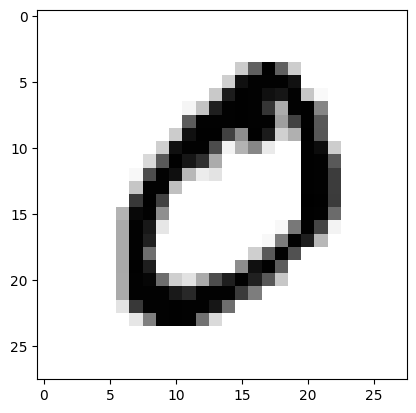

In [11]:
# After converting some_digit_image into 28x28 NumPy array
plt.imshow(some_digit_image, cmap=plt.cm.binary, interpolation='nearest')
# plt.axis('off')
plt.show()


In [12]:
y[digit]

0

In [13]:
x_train = mnist.data[:60000] # first 60,000 images for training
x_test  = mnist.data[60000:] # 60,000 to last (i.e. 70,000) is for testing 

In [14]:
y_train = mnist.target[:60000]
y_test  = mnist.target[60000:] 

In [15]:
import numpy as np
# it's a good practice
# for preventing overfitting
# This technique is commonly employed to ensure that the model does not learn patterns based on 
# the order of the training data.

# Assuming you have x_train and y_train datasets
shuffle_index = np.random.permutation(60000)  # 60000 is the number of training samples

x_train, y_train = x_train.iloc[shuffle_index], y_train.iloc[shuffle_index]


## Creating a 0 detector

In [16]:
y_train   = y_train.astype(np.int8)
y_test    = y_test.astype(np.int8)

In [17]:
y_train_0 = (y_train == 0)

In [18]:
y_train

43487    4
6417     8
15548    1
28704    6
15539    1
        ..
28078    2
7777     8
1580     4
43774    7
23053    3
Name: class, Length: 60000, dtype: int8

In [19]:
y_train_0

43487    False
6417     False
15548    False
28704    False
15539    False
         ...  
28078    False
7777     False
1580     False
43774    False
23053    False
Name: class, Length: 60000, dtype: bool

# CALCULATING ACCURACY OF MODEL

In [21]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression


# Create a Logistic Regression model
clf = LogisticRegression(tol=0.1, max_iter=1000, solver='liblinear')

# Get predicted labels using cross-validation
predicted_labels_target1 = cross_val_predict(clf, x_train, y_train,   cv=3)
predicted_labels_target2 = cross_val_predict(clf, x_train, y_train_0, cv=3)

# 1. RECALL

In [22]:
recall_target1 = recall_score(y_train, predicted_labels_target1, average='macro')
print("Recall for Target 1:", recall_target1)

Recall for Target 1: 0.897606748752389


In [23]:
recall_target2 = recall_score(y_train_0, predicted_labels_target2, average='binary')
print("Recall for Target 2:", recall_target2)

Recall for Target 2: 0.943440823906804


## 2. F1-SCORE

In [24]:
f1_target1 = f1_score(y_train, predicted_labels_target1, average='macro')
print("F1-Score for Target 1:", f1_target1)

F1-Score for Target 1: 0.8976925366288802


In [25]:
f1_target2 = f1_score(y_train_0, predicted_labels_target2, average='binary')
print("F1-Score for Target 2:", f1_target2)

F1-Score for Target 2: 0.9452761566438298


## 3. Confusion matrix

In [26]:
conf_matrix_target1 = confusion_matrix(y_train, predicted_labels_target1)
print("Confusion Matrix for Target 1:")
print(conf_matrix_target1)

Confusion Matrix for Target 1:
[[5746    2   10   12   17   20   48    9   54    5]
 [   1 6539   32   20    6   35    7   12   83    7]
 [  46   88 5187   93  105   20   85  114  192   28]
 [  40   53  149 5347   12  184   46   79  144   77]
 [  11   39   42    8 5312    6   49   11   74  290]
 [ 113   45   36  269   84 4346  125   34  252  117]
 [  43   24   33    5   44   75 5640    5   46    3]
 [  31   74   65   20   78    9    5 5734   31  218]
 [  64  220   68  150   47  214   50   39 4906   93]
 [  46   39   27  103  224   29    5  199   68 5209]]


In [27]:
conf_matrix_target2 = confusion_matrix(y_train_0, predicted_labels_target2)
print("\nConfusion Matrix for Target 2:")
print(conf_matrix_target2)


Confusion Matrix for Target 2:
[[53765   312]
 [  335  5588]]


## 4. Precision

In [28]:
precision_target1 = precision_score(y_train, predicted_labels_target1, average='macro')
print("\nPrecision for Target 1:", precision_target1)


Precision for Target 1: 0.8985373049650522


In [29]:
precision_target2 = precision_score(y_train_0, predicted_labels_target2, average='binary')
print("\nPrecision for Target 2:", precision_target2)


Precision for Target 2: 0.9471186440677966


## 5. Accuracy

In [30]:
from sklearn.metrics import accuracy_score

# Accuracy
accuracy_target1 = accuracy_score(y_train, predicted_labels_target1)
accuracy_target2 = accuracy_score(y_train_0, predicted_labels_target2)

# Print the results
print("\nAccuracy for Target 1:", accuracy_target1)
print("Accuracy for Target 2:",   accuracy_target2)


Accuracy for Target 1: 0.8994333333333333
Accuracy for Target 2: 0.9892166666666666


In [33]:
y_test_0 = (y_test == 0)

# Create a Logistic Regression model
clf = LogisticRegression(tol=0.1, max_iter=1000, solver='liblinear')

# Get predicted labels using cross-validation on the test set
predicted_labels_target1 = cross_val_predict(clf, x_test, y_test, cv=3)
predicted_labels_target2 = cross_val_predict(clf, x_test, y_test_0, cv=3)

# Confusion Matrix
conf_matrix_target1 = confusion_matrix(y_test, predicted_labels_target1)
conf_matrix_target2 = confusion_matrix(y_test_0, predicted_labels_target2)

# Accuracy
accuracy_target1 = accuracy_score(y_test, predicted_labels_target1)
accuracy_target2 = accuracy_score(y_test_0, predicted_labels_target2)

# Precision, Recall, and F1-Score
precision_target1 = precision_score(y_test, predicted_labels_target1, average='macro')
recall_target1 = recall_score(y_test, predicted_labels_target1, average='macro')
f1_target1 = f1_score(y_test, predicted_labels_target1, average='macro')

precision_target2 = precision_score(y_test_0, predicted_labels_target2, average='binary')
recall_target2 = recall_score(y_test_0, predicted_labels_target2, average='binary')
f1_target2 = f1_score(y_test_0, predicted_labels_target2, average='binary')




In [34]:
print("Confusion Matrix for Target 1:")
print(conf_matrix_target1)

print("\nAccuracy for Target 1:", accuracy_target1)
print("Precision for Target 1:", precision_target1)
print("Recall for Target 1:", recall_target1)
print("F1-Score for Target 1:", f1_target1)



Confusion Matrix for Target 1:
[[ 952    0    0    3    4    1    8    1   10    1]
 [   0 1084    1    4    1    2    4    2   36    1]
 [   6   11  873   15   29    4   15   22   50    7]
 [   2    2   23  889    2   26    6   17   25   18]
 [   2    2    8    1  885    0   10    1   19   54]
 [  12   11    4   44   30  684   20   10   54   23]
 [  10    3    6    1   11   13  895    3   15    1]
 [   1   22   20    5   11    2    1  915    6   45]
 [  14   22   10   27    9   29   11   17  818   17]
 [  13   11    5   15   54    7    1   40   18  845]]

Accuracy for Target 1: 0.884
Precision for Target 1: 0.8843165902354378
Recall for Target 1: 0.8822275422786957
F1-Score for Target 1: 0.8824295832965341


In [36]:
print("\nConfusion Matrix for Target 2:")
print(conf_matrix_target2)

print("\nAccuracy for Target 2:", accuracy_target2)
print("\nPrecision for Target 2:", precision_target2)
print("Recall for Target 2:", recall_target2)
print("F1-Score for Target 2:", f1_target2)


Confusion Matrix for Target 2:
[[8966   54]
 [  49  931]]

Accuracy for Target 2: 0.9897

Precision for Target 2: 0.9451776649746193
Recall for Target 2: 0.95
F1-Score for Target 2: 0.9475826972010178
